# Task 1
Create synthetic data generated by `f_true` below with a more complex model such as polynomial (plus random noise).
$$
f_{true}(x) = 2x + 1
$$
- Use equation `(@eq-w-vektor)` or `np.linalg.lstsq` or `LinearRegression` on `sklearn`. Then, compare the results yout get with the original parameter values in `f_true`.

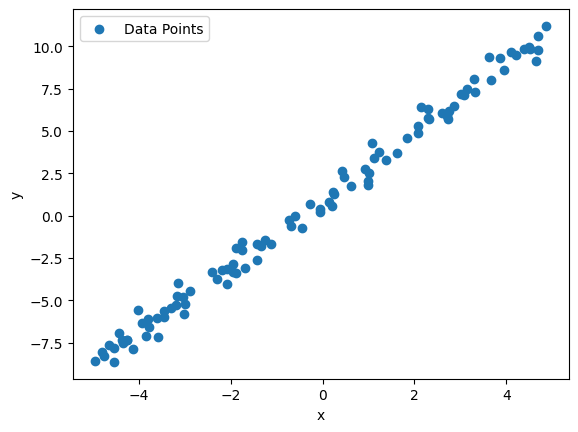

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Define f_true function
def f_true(x):
    return 2*x + 1

n = 100 # number of data points
noise = 0.3 # noise level

np.random.seed(42)
x1 = np.random.uniform(-5, 5, n)
y1 = f_true(x1) + noise * np.random.normal(0, 2, n)

# Plot the data points
plt.scatter(x1, y1, label = 'Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [45]:
# Gunakan persamaan normal untuk menemukan vektor w yang meminimalkan R2

# Define degree of polynomial
degree = 2 # Persamaan polinomial derajat 2

# Define X matrix
X = np.ones((len(x1), degree + 1))
for i in range(1, degree + 1):
    X[:, i] = x1**i

# Solve the normal equation for w
w = np.linalg.inv(X.T @ X) @ X.T @ y1

# Print the coefficients
print('Coefficients:')
for i in range(len(w)):
    print('w' + str(i) + ': ' + str(w[i]))

Coefficients:
w0: 0.8688074872174877
w1: 1.9761208156112984
w2: 0.013945528861288164


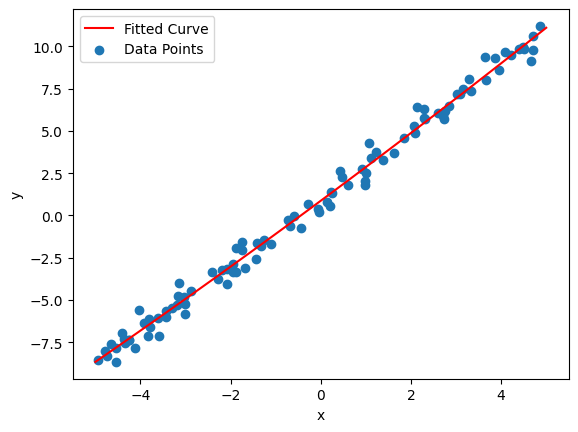

In [46]:
# Plot the fitted curve
x_range = np.linspace(-5, 5, 100)
y_range = np.zeros(100)
for i in range(len(w)):
    y_range += w[i] * x_range**i
plt.plot(x_range, y_range, color = 'red', label = 'Fitted Curve')
plt.scatter(x1, y1, label = 'Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [47]:
# Gunakan fungsi np.linalg.lstsq untuk mendapatkan solusi terbaik
w, res, rank, s = np.linalg.lstsq(X, y1, rcond = None)

# Print the coefficients
print('Coefficients:')
for i in range(len(w)):
    print('w' + str(i) + ': ' + str(w[i]))

Coefficients:
w0: 0.8688074872174841
w1: 1.9761208156112984
w2: 0.01394552886128908


In [48]:
# Selanjutnya gunakan fungsi LinearRegression dari sklearn.linear_model

# Degree of polynomial
degree = 2

# Create a polynomial feature transformer
poly_transformer = PolynomialFeatures(degree = degree)

# Transform the x values to include polynomial terms
X_poly = poly_transformer.fit_transform(x1.reshape(-1, 1))

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X_poly, y1)

# Print the coefficients
print('Coefficients:')
print(model.intercept_, model.coef_[1:])

Coefficients:
0.868807487217488 [1.97612082 0.01394553]


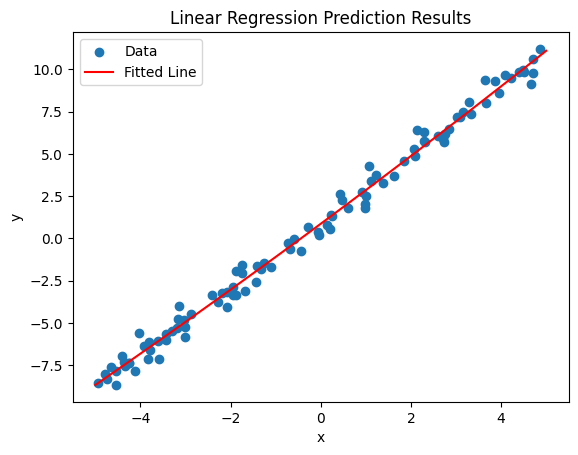

In [49]:
# Generate 100 x values in the range [-5, 5]
x_new = np.linspace(-5, 5, 100)

# Transform the x values to polynomial features
X_new = poly_transformer.transform(x_new.reshape(-1, 1))

# Predict the y values using the model
y_pred = model.predict(X_new)

# Plot the data points and the curve
plt.scatter(x1, y1, label='Data')
plt.plot(x_new, y_pred, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Prediction Results')
plt.legend()
plt.show()

In [50]:
# Calculate the R2 score
R2 = model.score(X_poly, y1)
print('R2_score on training data: ' + str(R2))

# Prediction on training data
RMSE = np.sqrt(np.mean((y1 - model.predict(X_poly))**2))
print('RMSE on training data: ' + str(RMSE))

R2_score on training data: 0.9918609529503291
RMSE on training data: 0.5289515288626031


#### Task 1 Analysis:
Based on what has been tested, it can be seen that the modeling results are close to the original function, which is `f_true(x)` where the approximation is done using a polynomial of degree 2 and obtained:
- The coefficient of x to the power of 2 is close to 0, which is 0.01394553
- The coefficient of x to the power of 1 is close to 2, which is 1.97612082
- The coefficient of x to the power of 0 or constant that is close to 1, which is around 0.868807487217488

The results obtained are not exactly the same as the actual coefficients in the function `f_true(x)`. This is caused by the random noise that was added when generating `y1` values so that when predicting, the results obtained will only approach the original value. The `R2_score` on the training data obtained is also very good at 99% and this value will continue to increase as the noise added to the `y1` value decreases, and vice versa.

---
# Task 2
Create synthetic data using a third-degree polynomial plus with random noise. Use data $x$ in the range $[-5,5]$, for example.
Use for example 20 data points.

- Perform regression using a model with a polynomial of degree 1 to 9 and calculate the loss or loss on each model using
  `(@eq-loss-function-01)`. Make a plot of data vs prediction results from the polynomial used.
  
- Make a plot with the x-axis being the polynomial degree and the y-axis is the loss calculated. Note: Loss is calculated using the most optimal parameters, namely the parameters obtained from `(@eq-w-vektor)`. At what degree polynomial is the smallest loss value obtained? Does the third-degree polynomial have the lowest loss value?

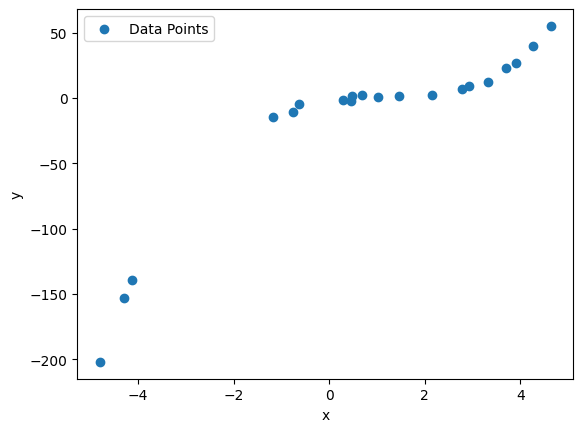

In [51]:
# Define linear_regression function
def linear_regression(x):
    return x**3 - 3*x**2 + 4*x - 2

np.random.seed(0)
# Generate 20 random x values in range [-5, 5]
x = np.random.uniform(-5, 5, size = 20)

# Generate the y values using linear_regression and add some noise
y = linear_regression(x) + noise*np.random.normal(0, 5, size = 20)

# Plot the data points
plt.scatter(x, y, label = 'Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Next, regression prediction was performed using models with polynomial degrees 1 to 9 and calculating the loss on each model as follows.

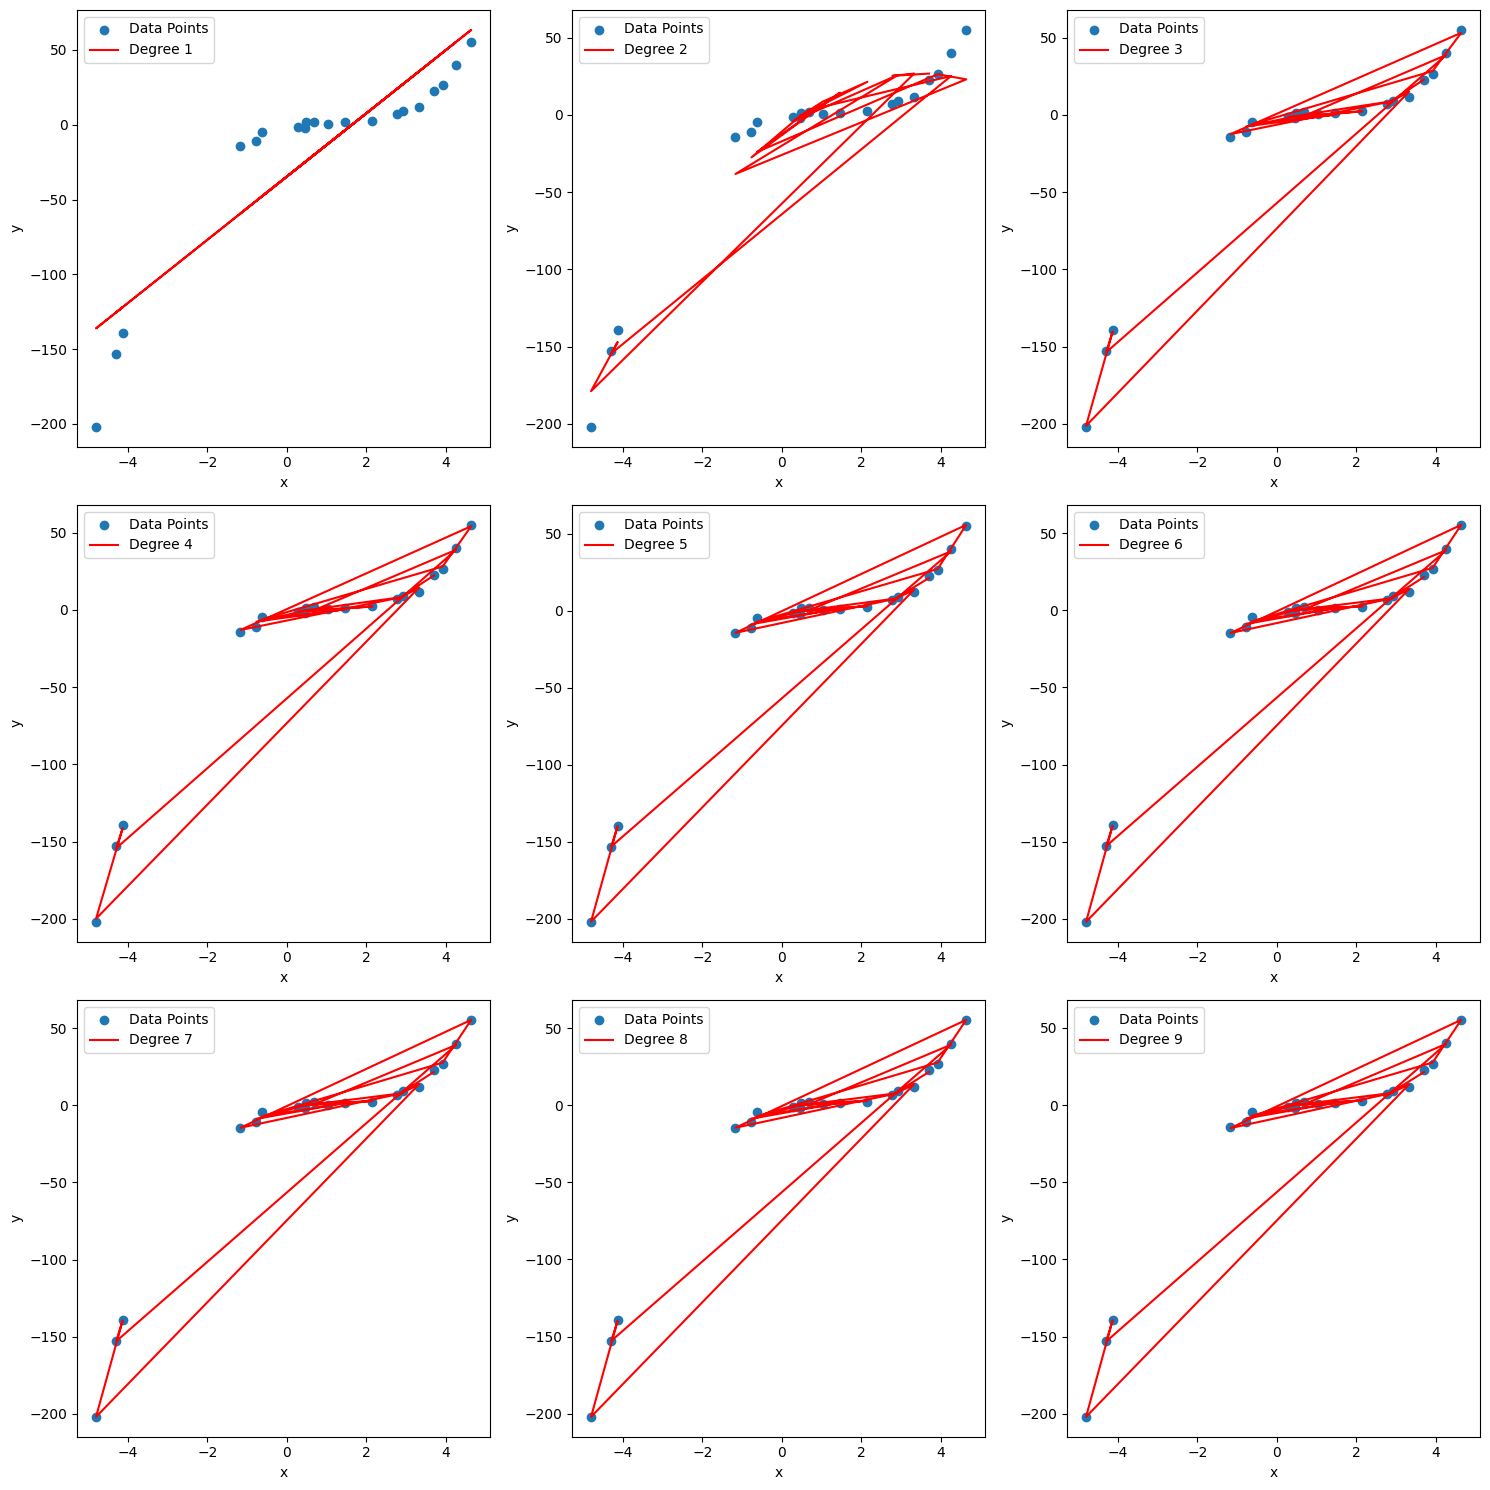

In [52]:
loss = []

# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize = (15, 15))

# Loop over the degrees from 1 to 9
for degree in range(9):
    # Create a polynomial feature transformer
    poly_transformer = PolynomialFeatures(degree = degree + 1)

    # Transform the x values to include polynomial terms
    X_poly = poly_transformer.fit_transform(x.reshape(-1, 1))

    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X_poly, y)

    # Calculate the loss for the current degree
    loss.append(mean_squared_error(y, model.predict(X_poly)))

    # Plot the data points and the curve on the corresponding subplot
    # Use integer division and modulo to get the row and column index of the subplot
    row = ((degree+1) - 1) // 3
    col = ((degree+1) - 1) % 3
    axs[row, col].scatter(x, y, label='Data Points')
    axs[row, col].plot(x, model.predict(X_poly), color='red', label=f'Degree {degree+1}')
    axs[row, col].set_xlabel('x')
    axs[row, col].set_ylabel('y')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

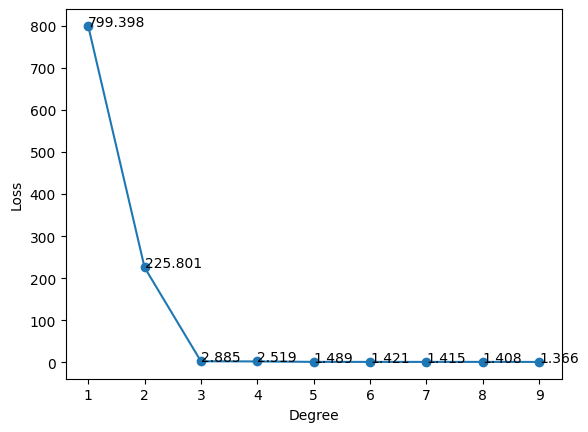

Degree with the minimum loss: 9
Minimum loss: 1.3656920469703033


In [53]:
# Plot the degree vs loss curve
plt.plot(range(1, 10), loss, '-o')
plt.xlabel('Degree')
plt.ylabel('Loss')
for i in range(9):
    plt.text(i+1, loss[i], f'{loss[i]:.3f}')
plt.show()

# print degree with the minimum loss value and print the corresponding loss
min_loss_degree = np.argmin(loss) + 1
print('Degree with the minimum loss: ' + str(min_loss_degree))
print('Minimum loss: ' + str(loss[min_loss_degree - 1]))

#### Task 2 Analysis:
- Based on the experiment that has been done, it was found that the polynomial degree that has the lowest loss value was obtained by the polynomial of degree 9. This is because the higher the degree of a polynomial, the easier the equation will approach the desired value due to the higher degree of freedom of the equation.
- When performing prediction model using the same degree as the original function, the loss generated was much smaller than the previous 2 degrees. This can be seen in the graph above and this indicates that the original function is a polynomial of degree 3. However, the reason why polynomial of degree 3 is not the polynomial with the lowest loss value is because when generating y values, this polynomial function has been added noise that causes its value to shift from its original value so that when performing approximation there will be limitations of the ability of this polynomial in approximating y values

---
# Task 3

Review Task 2. Now for the 20 points that exist, select the points that are on $-1 \leq x \leq 1$ as test data and the other points are training data.

You can use the following code.
```python
import numpy as np
Npoints = 20
x = np.linspace(-5.0, 5.0, Npoints)
idx1 = x <= 1
idx2 = x >= -1
idx_test = idx1 & idx2 # combine the condition
idx_train = ~idx_test # Other data is training data

x_train = x[idx_train]
x_test = x[idx_test]

# do similarly for y
# [....]
```

Repeat what you did in Task (2):

- $\mathbf{w}$ is now searched using only training data or training data.

- Loss is now calculated using test data

- Plot loss against polynomial order used. What order polynomial is resulting in the smallest loss?


## Use of sklearn

In the previous problem we have selected the area $-1 \leq x \leq 1$ as test data.
For more general cases, test data is usually selected randomly.
In `sklearn` we can use the `train_test_split` function. Example:

```python
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
```

## Model Selection

The problem of choosing a polynomial order is one example model selection. Model selection can be done based on several criteria. In the case of regression, one of the criteria that can be used is the value of the loss function on test data. Another method that is also often used is cross validation (cross validation).

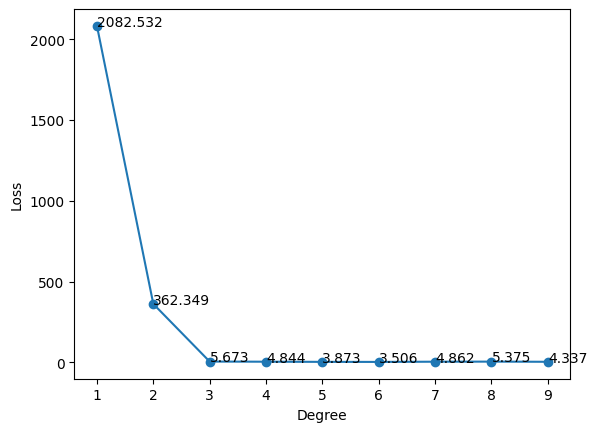

Coefficients for polynomial 1 degree: [-49.27857959  22.63912577]
Coefficients for polynomial 2 degree: [-20.63518771  21.65303572  -2.35592812]
Coefficients for polynomial 3 degree: [-2.57288217  3.64284342 -2.94014759  1.02916745]
Coefficients for polynomial 4 degree: [-1.94983251  3.88366619 -3.20909976  1.01944031  0.01230322]
Coefficients for polynomial 5 degree: [-2.61093649  5.42883673 -3.1301875   0.75935665  0.01108293  0.00916153]
Coefficients for polynomial 6 degree: [-2.17534023e+00  5.59302811e+00 -3.46111653e+00  7.55170174e-01
  4.46108461e-02  8.93115740e-03 -8.93937521e-04]
Coefficients for polynomial 7 degree: [-3.51221050e+00  6.06172548e+00 -2.38214249e+00  3.31581392e-01
 -4.91832252e-02  4.88413309e-02  1.22277436e-03 -9.80458712e-04]
Coefficients for polynomial 8 degree: [-3.73467316e+00  5.75107760e+00 -2.10947169e+00  5.37581104e-01
 -1.56029375e-01  3.13130133e-02  1.01467552e-02 -5.87948858e-04
 -2.08936295e-04]
Coefficients for polynomial 9 degree: [-6.08605

In [30]:
np.random.seed(42) # for reproducibility
# Generate 20 random x values in range [-5, 5]
x2 = np.random.uniform(-5, 5, size = 20)

# generate the corresponding y values using linear_regression and add some noise
y2 = linear_regression(x2) + noise*np.random.normal(0, 5, size = 20)

# Select the points that are in the range [-1, 1] as test data and other as train data
idx1 = x <= 1
idx2 = x >= -1
idx_test = idx1 & idx2 # combine the condition
idx_train = ~idx_test # Other data is training data

x_train = x[idx_train]
x_test = x[idx_test]

y_train = y[idx_train]
y_test = y[idx_test]


loss2 = []
w_list = []


for degree in range(1, 10):
    poly_transformer2 = PolynomialFeatures(degree=degree)
    X_train_poly2 = poly_transformer2.fit_transform(x_train.reshape(-1, 1))
    X_test_poly2 = poly_transformer2.transform(x_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_train_poly2, y_train)
    y_pred = model.predict(X_test_poly2)
    mse = mean_squared_error(y_test, y_pred)
    loss2.append(mse)

    X_matrix = np.ones((len(x_train), degree+1))
    
    # Calculate w for each degree
    for i in range(1, degree+1):
        X_matrix[:,i] = x_train**i
    w = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_train
    w_list.append(w)

# Plot the degree vs loss curve
plt.plot(range(1, 10), loss2, '-o')
plt.xlabel('Degree')
plt.ylabel('Loss')
for i in range(9):
    plt.text(i+1, loss2[i], f'{loss2[i]:.3f}')
plt.show()

# print w_list for each degree
for degree in range(len(w_list)):
    print(f'Coefficients for polynomial {degree+1} degree:', end=" ")
    print(f'{w_list[degree]}', end="\n")

In [37]:
# print the degree with the minimum loss with the loss value
print(f'Degree with minimum loss: {np.argmin(loss2) + 1}, Loss: {loss2[np.argmin(loss2)]}')

Degree with minimum loss: 6, Loss: 3.5056470504201656


#### Sklearn usage to find the best polynomial degree in Task 3

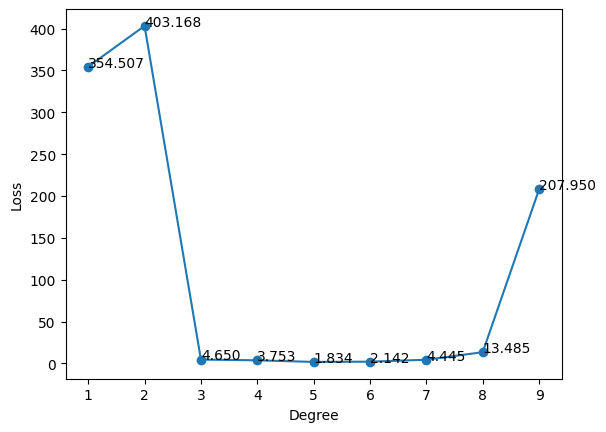

Degree with minimum loss: 5, Loss: 1.8339254794637838


In [39]:
# Penggunaan sklearn untuk menemukan derajat polinomial terbaik pada tugas 3

from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.33, random_state = 42)

loss3 = []

# Loop over the degrees from 1 to 9
for degree in range(1, 10):
    # Create a polynomial feature transformer
    poly_transformer1 = PolynomialFeatures(degree=degree)

    # Transform the x values to include polynomial terms
    X_train_poly3 = poly_transformer1.fit_transform(x_train2.reshape(-1, 1))
    X_test_poly3 = poly_transformer1.transform(x_test2.reshape(-1, 1))

    # Create a linear regression model and fit it to the train data
    model = LinearRegression()
    model.fit(X_train_poly3, y_train2)

    # Predict the y values using the test data
    y_pred2 = model.predict(X_test_poly3)

    # Calculate the mean squared error on the test data
    mse2 = mean_squared_error(y_test2, y_pred2)

    # Append the mse to the loss list
    loss3.append(mse2)

# Plot the degree vs loss curve
plt.plot(range(1, 10), loss3, '-o')
plt.xlabel('Degree')
plt.ylabel('Loss')
# tambahkan teks pada setiap titik
for i in range(9):
    plt.text(i+1, loss3[i], f'{loss3[i]:.3f}')
plt.show()

# print the degree with the minimum loss with the loss value
print(f'Degree with minimum loss: {np.argmin(loss3) + 1}, Loss: {loss3[np.argmin(loss3)]}')

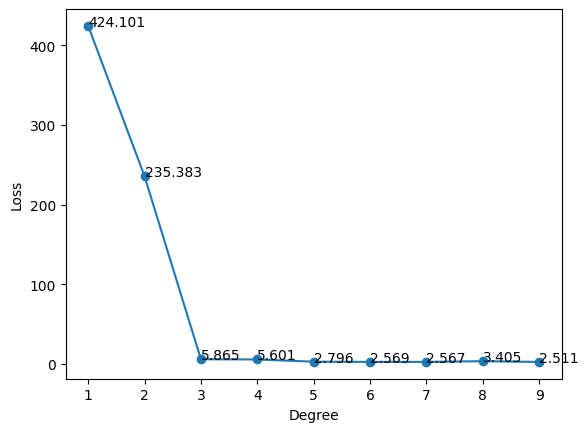

Degree with minimum loss: 9, Loss: 2.5106494793239715


In [41]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, train_size = 0.8, random_state = 42)

loss4 = []

# Loop over the degrees from 1 to 9
for degree in range(1, 10):
    # Create a polynomial feature transformer
    poly_transformer4 = PolynomialFeatures(degree=degree)

    # Transform the x values to include polynomial terms
    X_train_poly4 = poly_transformer4.fit_transform(x_train3.reshape(-1, 1))
    X_test_poly4 = poly_transformer4.transform(x_test3.reshape(-1, 1))

    # Create a linear regression model and fit it to the train data
    model = LinearRegression()
    model.fit(X_train_poly4, y_train3)

    # Predict the y values using the test data
    y_pred4 = model.predict(X_test_poly4)

    # Calculate the mean squared error on the test data
    mse3 = mean_squared_error(y_test3, y_pred4)

    # Append the mse to the loss list
    loss4.append(mse3)

# Plot the degree vs loss curve
plt.plot(range(1, 10), loss4, '-o')
plt.xlabel('Degree')
plt.ylabel('Loss')
# tambahkan teks pada setiap titik
for i in range(9):
    plt.text(i+1, loss4[i], f'{loss4[i]:.3f}')
plt.show()

# print the degree with the minimum loss with the loss value
print(f'Degree with minimum loss: {np.argmin(loss4) + 1}, Loss: {loss4[np.argmin(loss4)]}')

### Task 3 Analysis:
Based on the experiments conducted, it can be seen that when data splitting is done randomly and also fixed, there are differences in the minimum loss values produced by both models.
- First, modeling was done by selecting $-1 \leq x \leq 1$ as the test data. Then the degree with the minimum loss was obtained when the polynomial had a degree of 6 with a minimum loss of 3.5056.
- Then modeling was done again by changing the range of the test data and train data using sklearn and utilizing the train_test_split library. Then the division for the test_data was chosen to be 33% and the same method was used to obtain the loss values for polynomials with degrees from 1 to 9. It was found that the polynomial with a degree of 5 had the minimum loss of 1.8339.
- To obtain more accurate values, the experiment was repeated using sklearn with train_size = 80% (test_size = 20%). However, the minimum loss obtained was larger compared to the previous experiment with test_size = 33%, which was around 2.5106.

From the above experiments, it can be concluded that when performing data splitting, it is better to use random data splitting rather than using a fixed range because using the fixed range method in modeling can introduce bias.